In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy                  # http://scipy.org/
from scipy import signal

from IPython.display import Image  
%matplotlib inline
params = {'legend.fontsize': 24,
          'figure.figsize': (12, 8),
         'axes.labelsize': 24,
         'axes.titlesize': 24,
         'xtick.labelsize':24,
         'ytick.labelsize':24}
plt.rcParams.update(params) 



from IPython.display import Image
import sys 
sys.path.insert(0,'/home/aalmela/scm/git/utn/eaiii/2019/lib/')


#Image(filename= "fig/eje1.png",width=450)

El circuito de la figura corresponde a un receptor de Banda Aeronáutica ($118 MHz$ a $137 MHz$).  
Está sintonizado para recibir el canal de  $F_c = 118 MHz$, de ancho de banda del canal de $BW = 50 KHz$, y
 modulado al 50\%  por un tono único de $15\,KHz$.



Todos los elementos activos (Amplificadores, mezclador y detector) son lineales y de parámetros constantes dentro de toda la banda de interés. 


Ambos amplificadores (RF y FI) son sincrónicos.
$F_{ol} = F_{c} + 10.7 MHz$, $F_{FI}= 10.7 MHz$


La antena presenta una impedancia $R_{a}= 50 \Omega$ en toda la banda de interés. 

El detector presenta una impedancia de $R_{det}= 1000 \Omega$


Todos los tanques están adaptados a transferencia de energía a Q constate.

Las bobinas empleadas para el amplificador de RF poseen : $Q_{oL} = 100$ y $N = 100$ espiras.
Las bobinas empleadas para el amplificador de FI poseen : $Q_{oL} = 120$.
Capacitores con $Q_{oC} = \infty$.

Rechazo de frecuencia imagen  $\mid A_v{@f_{Img}} \mid = 55 dB$.


Nota: Para los cálculos despreciar las capacidades del transistor si son despreciables respecto al capacitor de sintonía.  



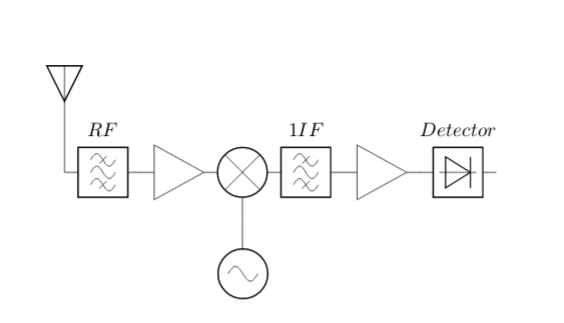

In [3]:
Image(filename= "fig/canvas.png",width=650)

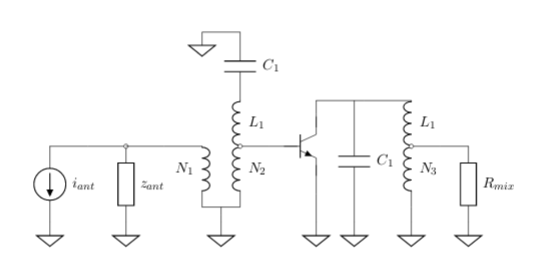

In [4]:
Image(filename= "fig/RF.png",width=650)

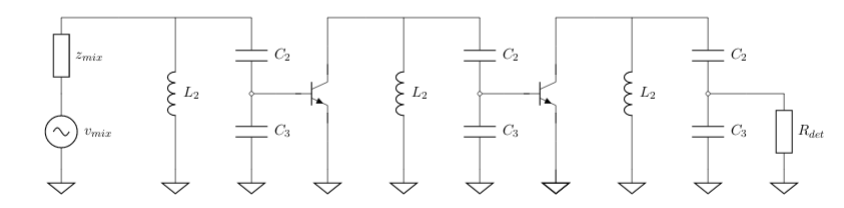

In [5]:
Image(filename= "fig/IF.png",width=650)

Los parámetros del transistor de RF:

$Y_{11} = (  1  + j4 ) mS$	

$Y_{12} \sim 0 S$ 

$Y_{21} = (  100 - j10  ) mS$ 

$Y_{22} = (0.2  + j8) mS$ 


    
Los parámetros del transistor de FI:

$Y_{11} = (  1  + j0.2) mS$	

$Y_{12} \sim 0 S$

$Y_{21} = (   40 - j2  ) mS$ 

$Y_{22} = (0.1 + j0.4) mS$
		


Los parámetros del mezclador:

$Y_{in}  = ( 1 ) mS$	

$Y_{out} = (0.1) mS$ 

$Av = 4 dB $  . 




Determinar:

1. Los $Q_{c}$ para las etapas de RF y FI respectivamente (10 puntos).

2. Los valores para L1, N1, N2, N3 y C1 (10 puntos).

3. Los valores para L2, C2 y C3. (10 puntos).

4. Calcular la ganancia de tensión del amplificador de RF (10 puntos). 

5. Calcular la ganancia de tensión del amplificador de FI (10 puntos). 

6. Calcular la ganancia de tensión total (10 puntos). 

7. Calcular la ganancia de potencia de cada amplificador y del amplificador total (10 puntos) (G = $\frac{P_{RL}}{P{in}} $ ). 

8. Con el receptor en su condición original ($f_{c} = 118 MHz$), una falla en el Oscilador Local hace que la frecuencia del mismo se corra a $f'_{ol} = 128.71 MHz$.  
Encontrar el índice de modulación (m) de la señal a la entrada del detector a la salida del mismo comparando con la condición de funcionamiento normal, siendo  $m = \frac {V_{pico} - V_{valle}}{V_{pico} + V_{valle}}$ (10 puntos).

9. Se re-sintoniza a $F_{rf} = 137 MHz$. Calcular el rechazo variando solamente $C_1$ y manteniendo constante $L_1$ (10 puntos)

10. Idem 9, calcular el rechazo variando solamente $L_1$ y manteniendo constante $C_1$, comparar con el resultado anterior (10 puntos). 


In [6]:
# Datos
frf    = 118e6 #Hz
fm     = 15e3 #Hz 
AttRF = 55 #dB
BWif  = 50e3 #Hz

#Numero de etapas RF
NetRF = 2
#Numero de etapas FI
NetIF = 3

# Impedancia de antena
rg    = 50 #ohm

# Impedancia detector
rdet  = 1e3 

# Transistor RF 
y11rf = 1e-3 + 1j * 4e-3
y12rf = 0
y21rf = 100e-3 - 1j * 10e-3
y22rf = 0.2e-3 + 1j * 8e-3

# Transistor IF 
y11if = 1e-3 + 1j * 0.2e-3
y12if = 0
y21if = 40e-3 - 1j * 2e-3
y22if = 0.1e-3 + 1j * 0.4e-3

# Mezclador 
yinmix  =  1e-3 
youtmix = 0.1e-3
Avmixdb = 4 #dB $  (G = $\frac{P_{in}}{P{RL}} $ ). 



# componentes
# Inductor RF
Qolrf = 100 
Nrf   = 100 # espiras

# Inductor FI
Qolif = 120
Nfi   = 120

Qoc = np.inf


# Frecuancia FI 
fif   = 10.7e6

# Frecuencia Oscilador
fosc  = frf + fif

# Frecuancia Imagen
fimg  = fosc + fif 
print(fimg)

139400000.0


Determinar:

1. Los $Q_{c}$ para las etapas de RF y FI respectivamente (10 puntos).


In [7]:
# Calculo de Qc de la etapa de RF
# Formula completa 
# Att = ( 1/(1+Qrf^2*(f/fo-fo/f)^2)^0.5 )^NetRF
# f = fimg
Qrf  = (( (10**(AttRF/20))**(2/NetRF)  - 1 ) / (fimg/frf - frf/fimg)**2 )**(1/2)

print('Qrf = {:1.2f}'.format(Qrf))


# Calculo de Qc de la etapa de IF
# Empleando aproximación de banda angosta
# (1 /(1+Xif^2)^0.5 )^3 = 1/(2)^0.5  
Xif = ( (2**(0.5))**(2/NetIF) - 1 )**0.5

# Xif = 2*Q*df/fo 
Qif = Xif/2/(BWif/2)*fif

print('Qif = {:1.2f} (Aprox. Banda Angosta)'.format(Qif))

# De igual manera, pero usando la expesion completa.
fifs = fif + (BWif/2)
Qif  = (( (2**(0.5))**(2/NetIF)  - 1 ) / (fifs/fif - fif/fifs)**2 )**(1/2)

print('Qif = {:1.2f} (Formula completa)'.format(Qif))


Qrf = 70.75
Qif = 109.10 (Aprox. Banda Angosta)
Qif = 109.23 (Formula completa)


2. Los valores para L1, N1, N2, N3 y C1 (10 puntos).


In [8]:
# Calculo de la etapa de RF
wrf = 2*np.pi*frf

# resistencia de entrada 
ri = 1/y11rf.real
ci = y11rf.imag/wrf

ro = 1/y22rf.real
co = y22rf.imag/wrf

#sintonizado de colector
# calculo a tope de bobina del colector 
XL1 = (1/Qrf-1/Qolrf) * (ro/2)
L1   = XL1 / wrf  
XC1 = XL1
C1  = 1/(XC1*wrf)

# Transformador de salida
rmix = 1/yinmix.real

# el transformador de salida debe llevar a rmix a ro para máxima transferencia de energía a Qcte
# (ro/rmix) = (Nrf/N3)^2
N3 = Nrf / ((ro/rmix)**(1/2) )

# Transformador de la entrada
# (ro/ri) = (Nrf/N2)^2
N2 = Nrf / ((ro/ri)**(1/2) )

# (ro/ri) = (Nrf/N2)^2
N1 = Nrf / ((ro/rg)**(1/2) )

print('Componentes de RF')
print('L1 = {:1.2e} Hy'.format(L1))
print('C1 = {:1.2e} F'.format(C1))
print('N  = {:1.2f} e'.format(Nrf))
print('N1 = {:1.2f} e'.format(N1))
print('N2 = {:1.2f} e'.format(N2))
print('N3 = {:1.2f} e'.format(N3))




Componentes de RF
L1 = 1.39e-08 Hy
C1 = 1.31e-10 F
N  = 100.00 e
N1 = 10.00 e
N2 = 44.72 e
N3 = 44.72 e


3. Los valores para L2, C2 y C3. (10 puntos).

In [43]:
# Calculo de la etapa de IF
wrf = 2*np.pi*100e6
Qrf = 12
Qo  = 30

# resistencia de entrada 
ro = 1200
co = 3e-12
ri = 900

#sintonizado de colector
# calculo a tope de bobina del colector 
XL2 = (1/Qrf-1/Qo) * (ro/2) + (wrf*co)
L2   = XL2 / wrf

# Capacitor de sintonia
XCif = XL2
Cif  = 1/(XCif*wrf)


# Divisor Capacitivo
Qm2 = ro*wrf*Cif 

print('Qm2 = {:1.2f} '.format(Qm2))
# (ro/ri) = (nc)^2
nc =  (ro/ri)**(1/2) 
Qm1 = ((1+Qm2**2)/nc-1)**0.5
print('Qm1 = {:1.2f} '.format(Qm1))

# Dado que Qm2 y Qm1 son mayores a 10, puedo emplear las ecuaciones aproximadas \
# para el calculo de los capacitorees
C3 = nc*Cif
C2 = nc/(nc-1)*Cif

print('Componentes de FI')
print('L2 = {:1.2f} nHy'.format(L2/1e-9))
print('Cif = {:1.2f}pF'.format(Cif/1e-12))
print('C2 = {:1.2f} pF'.format(C2/1e-12))
print('C3 = {:1.2f} pF'.format(C3/1e-12))


Qm2 = 40.00 
Qm1 = 37.22 
Componentes de FI
L2 = 47.75 nHy
Cif = 53.05pF
C2 = 395.96 pF
C3 = 61.25 pF


4. Calcular la ganancia de tensión del amplificador de RF (10 puntos). 


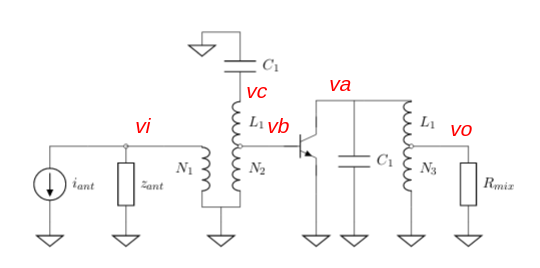

In [9]:
Image(filename= "fig/RFAv.png",width=650)

In [10]:
# Ganancia de tension RF
# |Avrf(frf)|  = vo/vi = (vo/va) . (va/vb) . (vb/vc) . (vc/vi)

Avoa = (N3/Nrf)


gmrf = abs(y21rf)
Avab = - gmrf * (wrf*L1*Qrf)

Avbc = (N2/Nrf)

Avci = (Nrf/N1)

Avrf = Avoa * Avab * Avbc * Avci

print('|Avrf| = {:1.2f} '.format(Avrf))

print('|Avrf| = {:1.2f} dB'.format(20*np.log10(abs(Avrf)  )))


|Avrf| = -146.97 
|Avrf| = 43.34 dB


5. Calcular la ganancia de tensión del amplificador de FI (10 puntos).

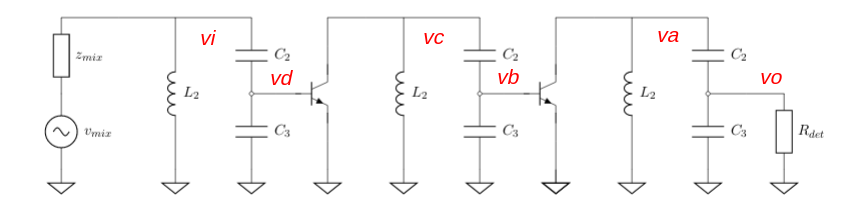

In [11]:
Image(filename= "fig/IFAv.png",width=650)

In [12]:
# Ganancia de tension IF
# |Avif(frf)|  = vo/vi = (vo/va) . (va/vb) . (vb/vc) . (vc/vd) . (vd/vi) 

Avoa = (1/nc)


gmif = abs(y21if)
Avab = - gmif * Qif*wif*L2

Avbc = (1/nc)

Avcd = - gmif * Qif*wif*L2

Avdi = (1/nc)


Avif = Avoa * Avab * Avbc * Avcd * Avdi


print('|Avif| = {:1.2f} '.format(Avif))

print('|Avif| = {:1.2f} dB'.format(20*np.log10(abs(Avif)  )))

|Avif| = 10.21 
|Avif| = 20.18 dB


6. Calcular la ganancia de tensión total (10 puntos).

In [13]:
# Ganancia de tensión del receptor
Avmix = 10**(Avmixdb/20) 

Av = Avrf * Avmix * Avif


print('|Av| = {:1.2f} '.format(Av))

print('|Av| = {:1.2f} dB'.format(20*np.log10(abs(Av)  )))

|Av| = -2379.39 
|Av| = 67.53 dB


7. Calcular la ganancia de potencia de cada amplificador y del amplificador total (10 puntos) (G = $\frac{P_{RL}}{P{in}} $ ). 

In [14]:
# Ganancia de potencia RF

# G = Pout/Pin
# Pin = vin^2/Rin
# Pout = vout^2/RL
# G = Av^2 * (rin/RL)

# Resistencia de entrada del Amplificador de RF
r11  = 1/(y11rf).real
r11p = r11*(Nrf/N2)**2


rpL1 = Qolrf * L1 * wrf 

rt  = (r11p*rpL1)/(r11p+rpL1)

rinRF = rt*(N1/Nrf)**2


# Resistencia de carga
rinMIX  = 1/yinmix.real

# Ganancia de potencia de RF
Grf = Avrf**2 * (rinRF/rinMIX)

print('|Grf| = {:1.2f} '.format(Grf))

print('|Grf| = {:1.2f} dB'.format(10*np.log10(abs(Grf)  )))

|Grf| = 185.00 
|Grf| = 22.67 dB


In [15]:
# Ganancia de potencia IF

# G = Pout/Pin
# Pin = vin^2/Rin
# Pout = vout^2/RL
# G = Av^2 * (Rin/RL)

r11  = 1/(y11if).real
r11p = r11*(nc)**2

rpL2 = Qolif * L2 * wif 


rinIF  = (r11p*rpL2)/(r11p+rpL2)


rl  = rdet

# Ganancia de potencia de IF
Gif = Avif**2 * (rinIF/rl)

print('|Gif| = {:1.2f} '.format(Gif))

print('|Gif| = {:1.2f} dB'.format(10*np.log10(abs(Gif)  )))

|Gif| = 49.03 
|Gif| = 16.90 dB


In [16]:
# Ganancia de potencia del mezclador

# G = Pout/Pin
# Pin = vin^2/Rin
# Pout = vout^2/RL
# G = Av^2 * (Rin/RL)

rin  = 1/yinmix.real
ro   = 1/youtmix.real

 

Gmix = Avmix**2 * (rin/rinIF)

print('|Gmix| = {:1.2f} '.format(Gmix))

print('|Gmix| = {:1.2f} dB'.format(10*np.log10(abs(Gmix)  )))

|Gmix| = 5.35 
|Gmix| = 7.28 dB


In [17]:
G = Grf * Gmix * Gif

print('|G| = {:1.2f} '.format(G))

print('|G| = {:1.2f} dB'.format(10*np.log10(abs(G)  )))

|G| = 48488.76 
|G| = 46.86 dB


8. Con el receptor en su condición original ($f_{c} = 118 MHz$), una falla en el Oscilador Local hace que la frecuencia del mismo se corra a $f'_{ol} = 128.71 MHz$.  
Encontrar el índice de modulación (m) de la señal a la entrada del detector a la salida del mismo comparando con la condición de funcionamiento normal, siendo  $m = \frac {V_{pico} - V_{valle}}{V_{pico} + V_{valle}}$ (10 puntos).

In [20]:
# La sintonia de la etapa de RF no se modifica
# Se modifica la respuesta del amplificador de IF 

# La frecuencia del oscilador local
fosc1 = 128.71e6 

# Portadora
fif1  = fosc1 - frf  
print('Frecuencia de la portadora en IF: {:1.4e} MHz'.format(fif1) )

# Banda inferior
fif1inf = fif1 - fm
print('Frecuencia de la frecuencia inferior en IF: {:1.4e} MHz'.format(fif1inf) )

# Banda inferior
fif1sup = fif1 + fm 
print('Frecuencia de la frecuencia superior en IF: {:1.4e} MHz'.format(fif1inf) )

# Calculo de la respuesta del filtro de IF 
Ainf = 1/(1+Qif**2 * (fif1inf/fif - fif/fif1inf)**2)**(NetIF/2)


Aif1 = 1/(1+Qif**2 * (fif1/fif - fif/fif1)**2)**(NetIF/2)


Asup = 1/(1+Qif**2 * (fif1sup/fif - fif/fif1sup)**2)**(NetIF/2)


print('Ganancias:')
print('Ainf = {:1.2f} '.format(Ainf))
print('Aif1 = {:1.2f} '.format(Aif1))
print('Asup = {:1.2f} '.format(Asup))

Vinf = Ainf*0.25
Vif1 = Aif1*1.00
Vsup = Asup*0.25

print('Respuestas:')
print('Vinf = {:1.2f} '.format(Vinf))
print('Vif1 = {:1.2f} '.format(Vif1))
print('Vsup = {:1.2f} '.format(Vsup))

Vpico  = Vif1 + Vinf  + Vsup
Vvalle = Vif1 - Vinf  - Vsup

m = (Vpico - Vvalle)/(Vpico + Vvalle)
print('m = {:1.2f} '.format(m))

Frecuencia de la portadora en IF: 1.0710e+07 MHz
Frecuencia de la frecuencia inferior en IF: 1.0695e+07 MHz
Frecuencia de la frecuencia superior en IF: 1.0695e+07 MHz
Ganancias:
Ainf = 0.98 
Aif1 = 0.94 
Asup = 0.71 
Respuestas:
Vinf = 0.25 
Vif1 = 0.94 
Vsup = 0.18 
m = 0.45 


9. Se re-sintoniza a $F_{rf} = 137 MHz$. Calcular el rechazo variando solamente $C_1$ y manteniendo constante $L_1$ (10 puntos)


In [21]:
# Calculo de la etapa de RF
frfa =  137e6
wrfa = 2*np.pi*frfa

# resistencia de entrada 
ri = 1/y11rf.real
ci = y11rf.imag/wrf

ro = 1/y22rf.real
co = y22rf.imag/wrf

#sintonizado de colector
# calculo a tope de bobina del colector 
C1a  = 1/(L1*wrfa**2)

Qrfa  = Qrf*wrf/wrfa

print('Qrfa = {:1.2f} '.format(Qrfa))
print('Qrf  = {:1.2f} '.format(Qrf))

Qrfa = 60.94 
Qrf  = 70.75 


10. Idem 9, calcular el rechazo variando solamente $L_1$ y manteniendo constante $C_1$, comparar con el resultado anterior (10 puntos). 

In [ ]:
# Calculo de la etapa de RF
frfb =  137e6
wrfb = 2*np.pi*frfb



#sintonizado de colector
# calculo a tope de bobina del colector 
L1b  = 1/(C1*wrfb**2)

Qrfb  = Qrf*(wrf*L1)/(wrfb*L1b)

print('Qrfb = {:1.2f} '.format(Qrfb))
print('Qrf  = {:1.2f} '.format(Qrf))

Se desea que $R_s  = 10 \Omega$, se vea a la entrada como $R_p  = 1000 \Omega$    

La conversión serie paralelo de una resistencia:
$R_p = R_s \cdot (1 + Q_m^2 ) $

Entonces, $Q_m$:

$Q_m = \sqrt{\frac{R_p}{R_s} - 1} $

Para un circuito serie:

$Q_m = \frac{w_o \cdot L_s}{R_s} $

y para un circuito paralelo:

$Q_m = \frac{R_p}{w_o \cdot L_p} $

Si calculamos $L_s$:

$L_s = \frac{Q_m \cdot R_s}{w_o} $

La $r_p$ del inductor:

$r_p = \frac{w_o \cdot L_s}{Q_o} $

Entonces, $L_p$:

$L_p = L_s \cdot (1 + \frac{1}{Q_m^2} ) $

Por último, el $C$:

$C = \frac{1}{w_o^2 \cdot L_p} $



In [ ]:
fo = 100e6
wo = 2*np.pi*fo
Rs = 10
Rp = 1000 
Qo = 100

Qm = (Rp/Rs -1 )**(1/2)
Ls  = Rs*Qm/wo
rp  = Ls*wo/Qo
print('.param rp= {:3.3e}'.format(rp) )

Lp  = Ls*(1+1/Qm**2)

print('.param L= {:3.3e}'.format(Ls) )

C  = 1/(wo**2*Lp)
print('.param C= {:3.3e}'.format(C) )
